In [91]:
# Bibliotecas 
# Análise e manipulação de dados
import pandas as pd
import numpy as np
# Gráficas
import matplotlib.pyplot as plt
import seaborn as sns

# ML
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, plot_roc_curve, roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Estatistica
from statsmodels.distributions.empirical_distribution import ECDF 

# Setando configurações
import matplotlib.style as style
sns.set()
style.use('ggplot')

# Análise Exploratória

In [6]:
df = pd.read_csv('advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [9]:
# Contexto: Baseado nas informações de usuários, devemos descobrir se ele
# clicou ou não em uma propaganda.

# Podemos modelar um algoritmo que vai prever se um usuário clicará ou não
# baseado em suas características.


In [12]:
# Informações e tipos de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [13]:
# Análise descritiva de cada coluna numérica
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [16]:
# Ver se existem nulos
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

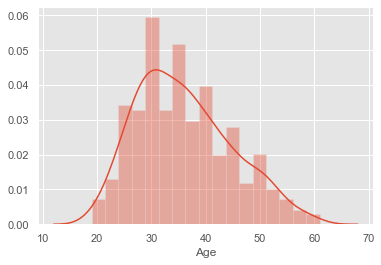

In [18]:
# Verificando a distribuição das idades
sns.distplot(df['Age'])

Text(0.5, 1.0, 'Não clicou no anuncio')

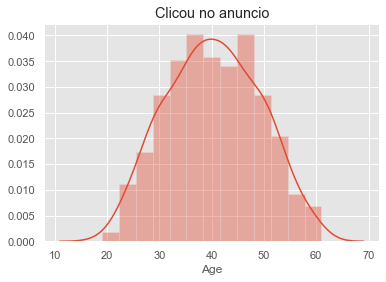

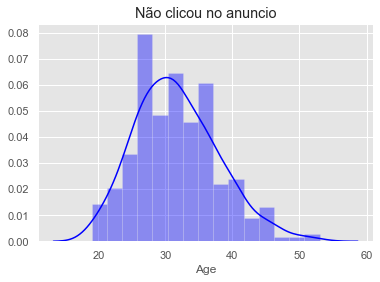

In [23]:
# Verificando a distribuição das idades e se clicou ou não
sns.distplot(df['Age'][df['Clicked on Ad']==1])
plt.title('Clicou no anuncio')
plt.figure()
sns.distplot(df['Age'][df['Clicked on Ad']==0], color='blue')
plt.title('Não clicou no anuncio')

In [24]:
# Podemos perceber que a tendencia é haver mais cliques feitos por pessoas com mais idade
# Paralelamente, pessoas mais novas tendem a clicar menos em anuncios

In [28]:
# Podemos plotar duas ECDF e compara-las
ecdf_age_nclick = ECDF(df['Age'][df['Clicked on Ad']==0])
ecdf_age_click = ECDF(df['Age'][df['Clicked on Ad']==1])

0 a 40 anos representa 91.6% das idades


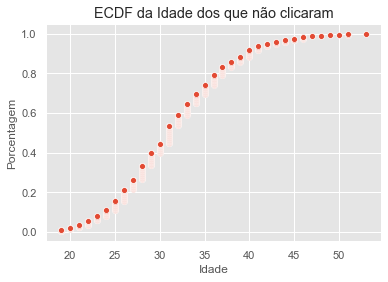

In [40]:
# Para NÃO-CLICOU temos a seguinte distribuição:
sns.scatterplot(ecdf_age_nclick.x,ecdf_age_nclick.y)
plt.title('ECDF da Idade dos que não clicaram')
plt.ylabel('Porcentagem')
plt.xlabel('Idade')

print('0 a 40 anos representa {}% das idades'.format(round(ecdf_age_nclick(40)*100,2)))

0 a 40 anos representa 50.6% das idades


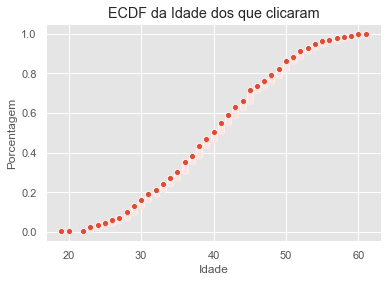

In [42]:
# Para CLICOU temos a seguinte distribuição:
sns.scatterplot(ecdf_age_click.x,ecdf_age_click.y)
plt.title('ECDF da Idade dos que clicaram')
plt.ylabel('Porcentagem')
plt.xlabel('Idade')

print('0 a 40 anos representa {}% das idades'.format(round(ecdf_age_click(40)*100,2)))

In [43]:
# Podemos perceber que das pessoas que clicaram cerca de 50% estão abaixo de 40 anos
# Para pessoas que não clicaram cerca de 90% estão abaixo de 40 anos

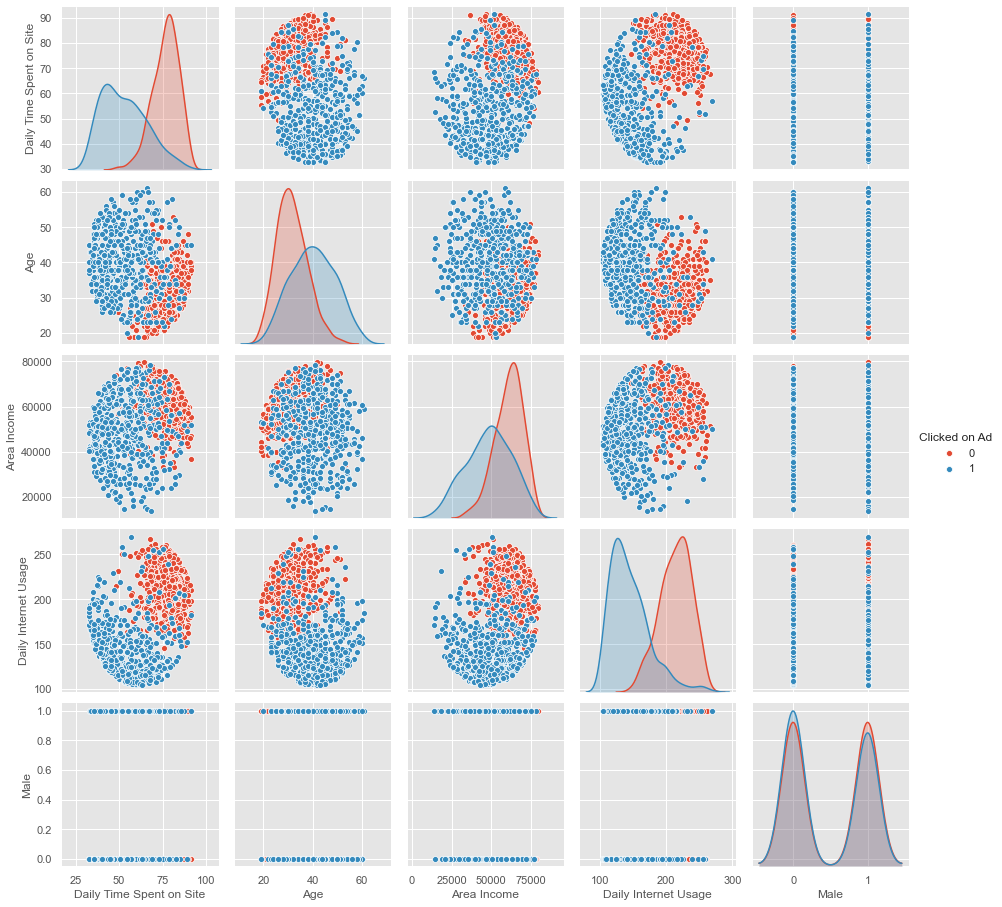

In [68]:
# Podemos verificar a correlação entre as váriaveis
sns.pairplot(df, hue = 'Clicked on Ad')

In [48]:
# Podemos perceber diversos fatores nestes gráficos:
# O tempo gasto no site e a quantidade de uso diário de internet 
# entre quem clicou e não clicou é visivel
# Há agrupamentos possiveis de se segmentar em todas as combinações de 
# váriaveis, destacando principalmente: quantidade de uso diário de internet
# e tempo gasto diariamente.

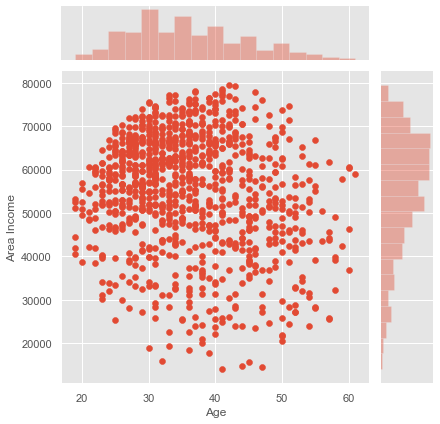

In [51]:
# Podemos avaliar com mais precisão individualmente:
sns.jointplot(x='Age', y='Area Income', data=df)

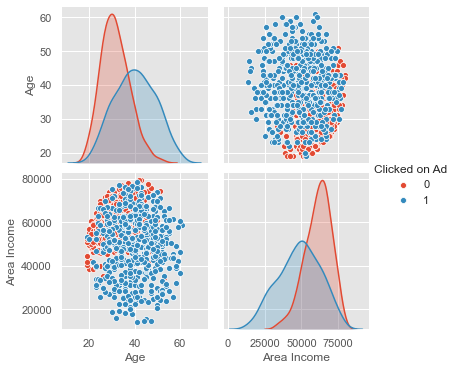

In [55]:
sns.pairplot(df[['Age','Area Income','Clicked on Ad']], hue='Clicked on Ad')

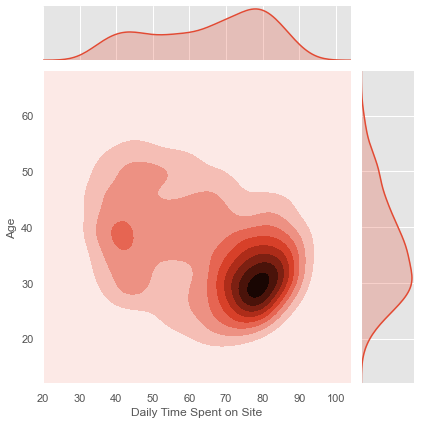

In [61]:
# Podemos avaliar com mais precisão individualmente:
sns.jointplot(x='Daily Time Spent on Site', y='Age', data=df, kind='kde')

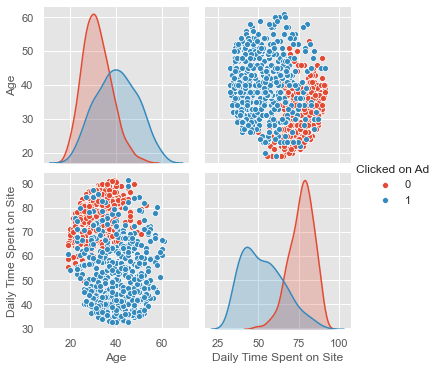

In [59]:
sns.pairplot(df[['Age','Daily Time Spent on Site','Clicked on Ad']], hue='Clicked on Ad')

In [60]:
# Quanto mais tempo a pessoa passa no site, menos tende a clicar.
# Quanto mais nova a pessoa, menos tende a clicar.

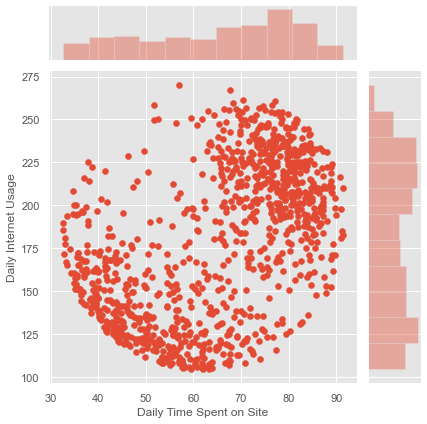

In [62]:
# Podemos avaliar com mais precisão individualmente:
sns.jointplot(x='Daily Time Spent on Site', y='Daily Internet Usage', data=df)

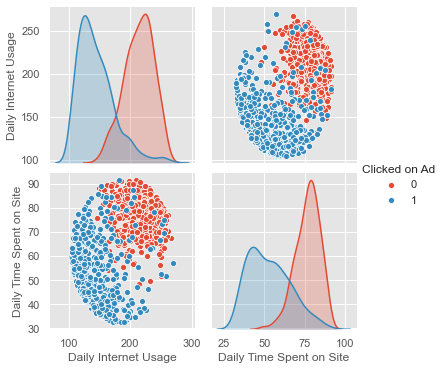

In [64]:
sns.pairplot(df[['Daily Internet Usage','Daily Time Spent on Site','Clicked on Ad']], hue='Clicked on Ad')

In [65]:
# Quanto mais tempo a pessoa passa na internet, 
# menor a tendencia dela clicar em anuncios.

# Criação do Modelo (Regressão Logistica)

In [73]:
df.head(3)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0


In [76]:
# Dividindo em X e y

X = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]
y = df['Clicked on Ad']

In [78]:
# Dividindo 70/30 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [79]:
# Regressao Logistica
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [81]:
# Verificando acurácia
logreg.score(X_test, y_test)

0.8966666666666666

In [82]:
y_pred = logreg.predict(X_test)

In [83]:
# Métricas de classificação:
print('Matriz de Confusão:')
print(confusion_matrix(y_test, y_pred))

Matriz de Confusão:
[[140   6]
 [ 25 129]]


In [89]:
# Classification Report com métricas importantes para classificação
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       146
           1       0.96      0.84      0.89       154

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



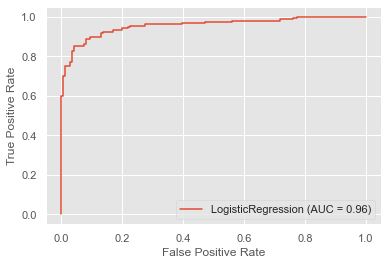

In [90]:
# ROC Curve
plot_roc_curve(logreg, X_test, y_test)

In [92]:
# Podemos tentar utilizar outro classificador e comparar
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [94]:
rfc.score(X_test, y_test)

0.9566666666666667

In [95]:
y_pred_rfc = rfc.predict(X_test)

In [96]:
# Métricas de classificação:
print('Matriz de Confusão:')
print(confusion_matrix(y_test, y_pred_rfc))

Matriz de Confusão:
[[141   5]
 [  8 146]]


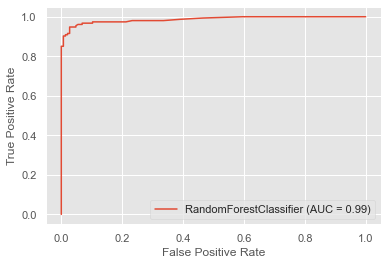

In [97]:
# ROC Curve
plot_roc_curve(rfc, X_test, y_test)

In [98]:
# Podemos perceber que utilizando o RandomForestClassifier nosso classificador
# Fica muito mais acurado!